In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
df = pd.read_csv("laptop_data.csv")

In [100]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [101]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [102]:
df.shape

(1303, 12)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [104]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [105]:
df.duplicated().sum()

0

In [106]:
df.drop(columns = ["Unnamed: 0"],inplace = True)

In [107]:
df["Ram"]=df["Ram"].str.replace("GB","").astype("int32")

In [108]:
df["Weight"]=df["Weight"].str.replace("kg","").astype("float")

In [109]:
df["Cpu"].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [110]:
df["cpu_name"] = df["Cpu"].apply(lambda x: " ".join(x.split()[0:3]))

In [111]:
def processor(x):
    if (x == "Intel Core i5") or (x == "Intel Core i7") or (x == "Intel Core i3"):
        return x
    elif x.split()[0]=="Intel":
        return "other Intel processor"
    else:
        return 'AMD Processor'

In [112]:
df["processor_name"]=df["cpu_name"].apply(processor)

In [113]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,cpu_name,processor_name
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel Core i5,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel Core i5,Intel Core i5


<Axes: >

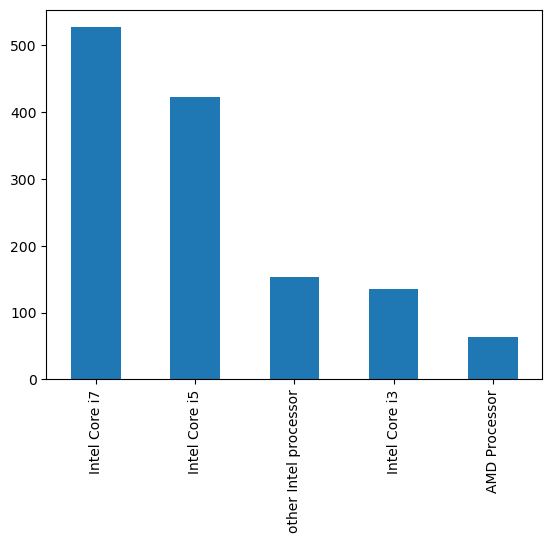

In [114]:
df['processor_name'].value_counts().plot(kind='bar')

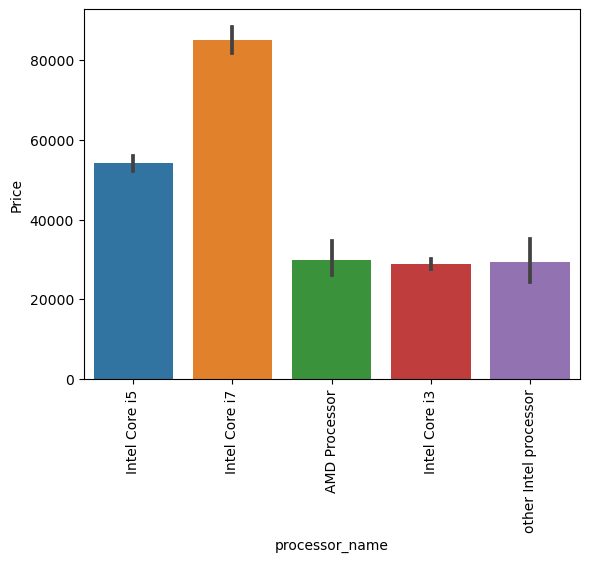

In [115]:
sns.barplot(x=df['processor_name'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [116]:
df.drop(columns=['Cpu','cpu_name'],inplace=True)

In [117]:
df["touchscreen"] = df["ScreenResolution"].apply(lambda x: 1 if " Touchscreen" in x else 0 )

In [118]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,processor_name,touchscreen
1051,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,8,1TB HDD,Nvidia GeForce 940MX,Windows 10,1.91,52161.12,Intel Core i7,0
50,Lenovo,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,4,64GB Flash Storage,Intel HD Graphics 400,Android,0.69,16996.32,other Intel processor,1
769,Acer,Notebook,15.6,1366x768,4,1TB HDD,Intel HD Graphics 505,Linux,2.10,15877.44,other Intel processor,0
804,Dell,Netbook,11.6,1366x768,4,128GB SSD,Intel HD Graphics 505,Windows 10,1.63,39640.32,other Intel processor,0
565,Dell,Ultrabook,13.3,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,8,128GB SSD,Intel UHD Graphics 620,Windows 10,1.21,85194.72,Intel Core i5,1


<Axes: >

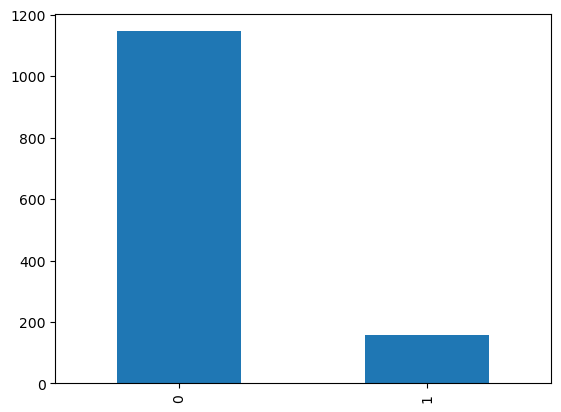

In [119]:
df['touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='touchscreen', ylabel='Price'>

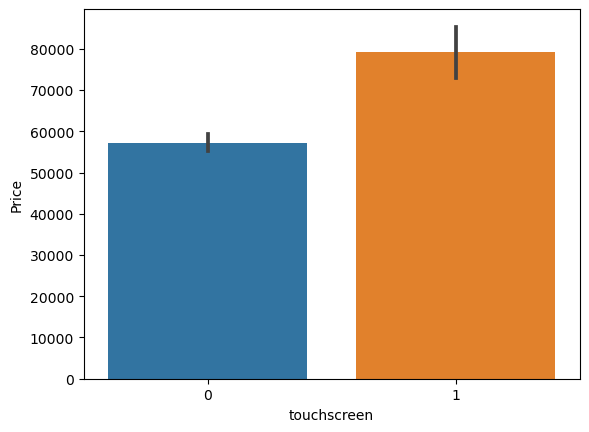

In [120]:
sns.barplot(x=df['touchscreen'],y=df['Price'])

In [121]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

<Axes: >

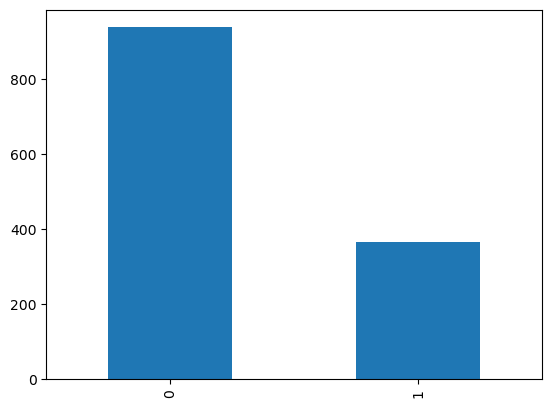

In [122]:
df['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Ips', ylabel='Price'>

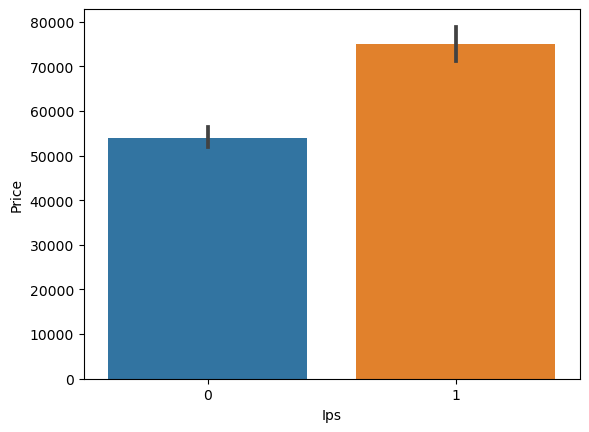

In [123]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [124]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [125]:
df['x_res'] = new[0]
df['y_res'] = new[1]

In [126]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,processor_name,touchscreen,Ips,x_res,y_res
1177,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,16,512GB SSD,Nvidia GeForce GTX 960,Windows 10,3.31,69530.4000,Intel Core i7,0,1,IPS Panel Full HD 1920,1080
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel Core i5,0,0,Full HD 1920,1080
865,HP,Notebook,15.6,Full HD 1920x1080,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.07,48484.8000,Intel Core i5,0,0,Full HD 1920,1080
879,HP,Notebook,15.6,Full HD 1920x1080,4,256GB SSD,Intel HD Graphics 620,Windows 10,2.04,44701.9200,Intel Core i5,0,0,Full HD 1920,1080
394,Dell,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,AMD Radeon R7 M445,Linux,2.33,41498.1936,Intel Core i7,0,0,Full HD 1920,1080


In [127]:
df["x_res"] = df["x_res"].apply(lambda x:x.split()[-1]).astype("int")

In [128]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,processor_name,touchscreen,Ips,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel Core i5,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel Core i5,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel Core i7,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel Core i5,0,1,2560,1600


In [129]:
df['y_res']=df['y_res'].astype("int")

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Ram               1303 non-null   int32  
 5   Memory            1303 non-null   object 
 6   Gpu               1303 non-null   object 
 7   OpSys             1303 non-null   object 
 8   Weight            1303 non-null   float64
 9   Price             1303 non-null   float64
 10  processor_name    1303 non-null   object 
 11  touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  x_res             1303 non-null   int32  
 14  y_res             1303 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 137.6+ KB


In [131]:
df.corr()['Price']

C:\Users\USER\AppData\Local\Temp\ipykernel_18464\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
touchscreen    0.192934
Ips            0.252208
x_res          0.556529
y_res          0.552809
Name: Price, dtype: float64

In [132]:
df['ppi'] = (((df['x_res']**2) + (df['y_res']**2))**0.5/df['Inches']).astype('float')

In [133]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,processor_name,touchscreen,Ips,x_res,y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel Core i5,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel Core i5,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel Core i7,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel Core i5,0,1,2560,1600,226.983005


In [134]:
df.corr()['Price']

C:\Users\USER\AppData\Local\Temp\ipykernel_18464\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
touchscreen    0.192934
Ips            0.252208
x_res          0.556529
y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [135]:
df.drop(columns=['Inches','x_res','y_res'],inplace=True)

In [136]:
df.drop(columns=["ScreenResolution"],inplace=True)

In [137]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,processor_name,touchscreen,Ips,ppi
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5,0,1,226.983005
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel Core i5,0,0,127.677940
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel Core i5,0,0,141.211998
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel Core i7,0,1,220.534624
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel Core i5,0,1,226.983005


<Axes: >

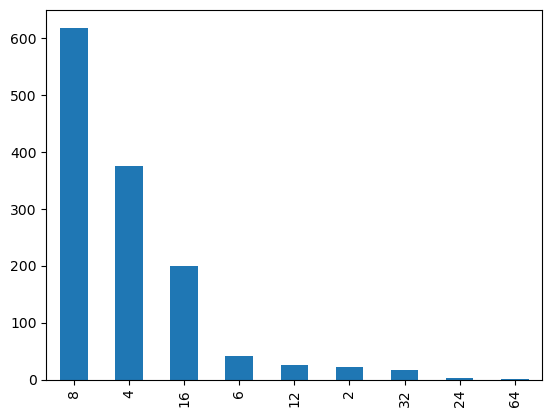

In [138]:
df['Ram'].value_counts().plot(kind='bar')

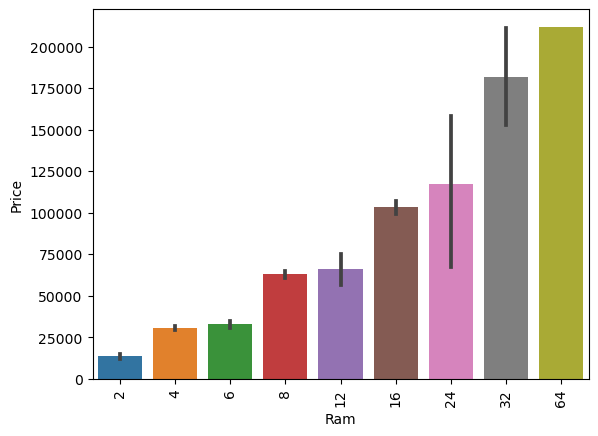

In [139]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [140]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [141]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_18464\4023190604.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
C:\Users\USER\AppData\Local\Temp\ipykernel_18464\4023190604.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [142]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,processor_name,touchscreen,Ips,ppi,HDD,SSD,Hybrid,Flash_Storage
1145,HP,Workstation,8,256 SSD,Nvidia Quadro M1000M,Windows 7,2.00,101178.7200,Intel Core i7,0,0,141.211998,0,256,0,0
809,Lenovo,Notebook,4,1000 HDD,Nvidia GeForce 920M,Windows 10,2.40,32447.5200,Intel Core i5,0,0,141.211998,1000,0,0,0
913,HP,Notebook,8,256 SSD,Nvidia GeForce 930MX,Windows 10,2.04,54291.7872,Intel Core i7,0,0,141.211998,0,256,0,0
317,Lenovo,Notebook,4,16 Flash Storage,Intel HD Graphics 510,Chrome OS,1.45,24503.4720,other Intel processor,0,0,117.826530,0,0,0,16
232,Lenovo,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,3.20,79866.7200,Intel Core i7,0,1,141.211998,1000,256,0,0


In [143]:
df.drop(columns=['Memory'],inplace=True)

In [144]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,processor_name,touchscreen,Ips,ppi,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5,0,1,226.983005,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel Core i5,0,0,127.677940,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel Core i5,0,0,141.211998,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel Core i7,0,1,220.534624,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel Core i5,0,1,226.983005,0,256,0,0


In [145]:
df.corr()['Price']

C:\Users\USER\AppData\Local\Temp\ipykernel_18464\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Ram              0.743007
Weight           0.210370
Price            1.000000
touchscreen      0.192934
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [146]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [147]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [148]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [149]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,processor_name,touchscreen,Ips,ppi,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5,0,1,226.983005,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel Core i5,0,0,127.677940,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel Core i5,0,0,141.211998,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel Core i7,0,1,220.534624,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel Core i5,0,1,226.983005,0,256,Intel


In [150]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [151]:
df = df[df['Gpu brand'] != 'ARM']

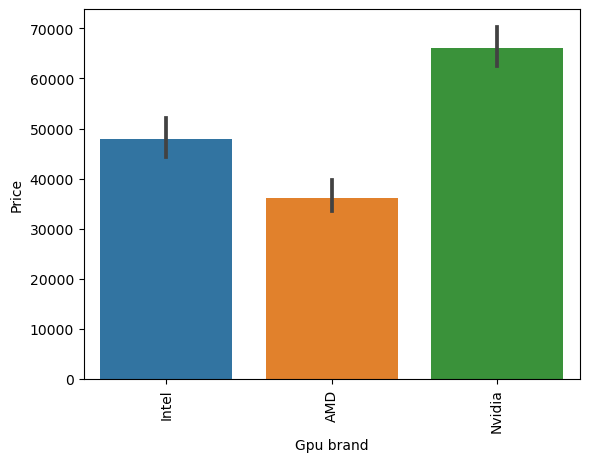

In [152]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [153]:
df.drop(columns=['Gpu'],inplace=True)

In [154]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

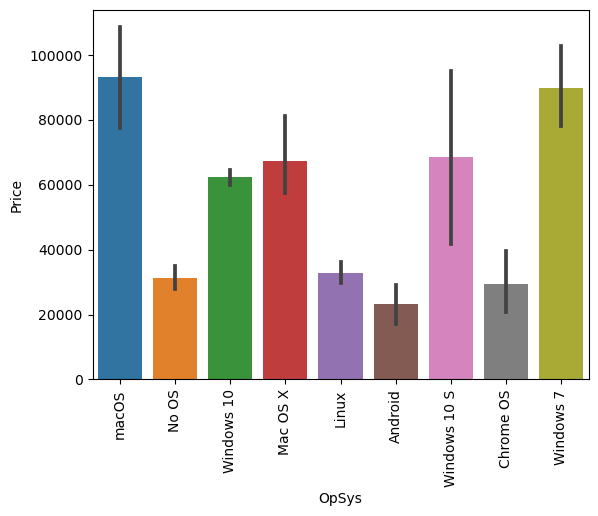

In [155]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [156]:
def ops(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'
    

In [157]:
df['os'] = df['OpSys'].apply(ops)

In [158]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,processor_name,touchscreen,Ips,ppi,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,Intel Core i5,0,1,226.983005,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,Intel Core i5,0,0,127.677940,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,Intel Core i5,0,0,141.211998,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,Intel Core i7,0,1,220.534624,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,Intel Core i5,0,1,226.983005,0,256,Intel,Mac


In [159]:
df.drop(columns=['OpSys'],inplace=True)

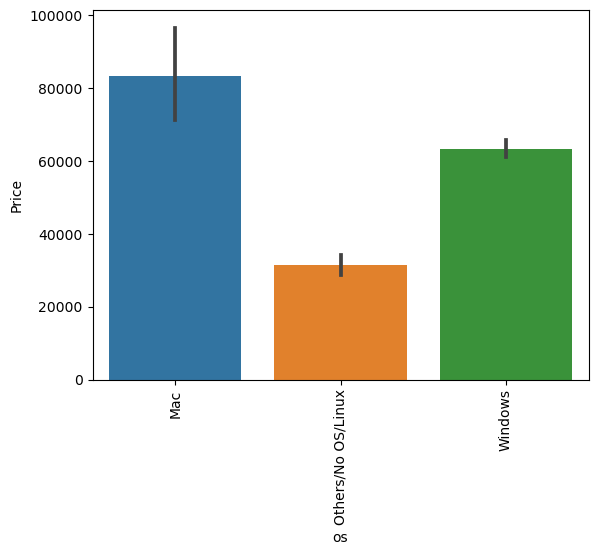

In [160]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_18464\1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

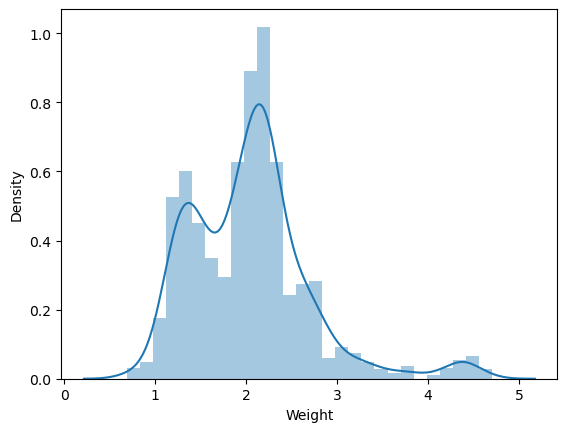

In [161]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

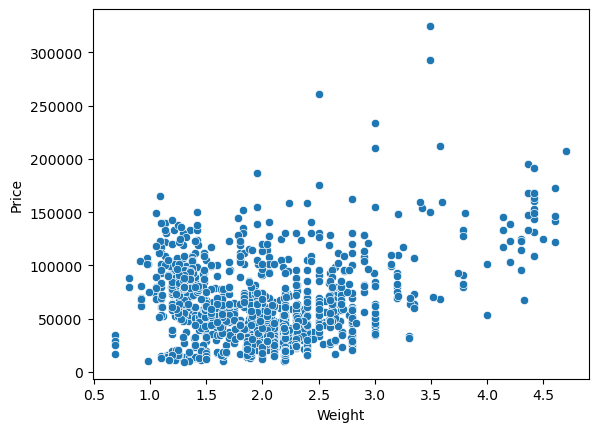

In [162]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [163]:
df.corr()['Price']

C:\Users\USER\AppData\Local\Temp\ipykernel_18464\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Ram            0.742905
Weight         0.209867
Price          1.000000
touchscreen    0.194894
Ips            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

C:\Users\USER\AppData\Local\Temp\ipykernel_18464\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

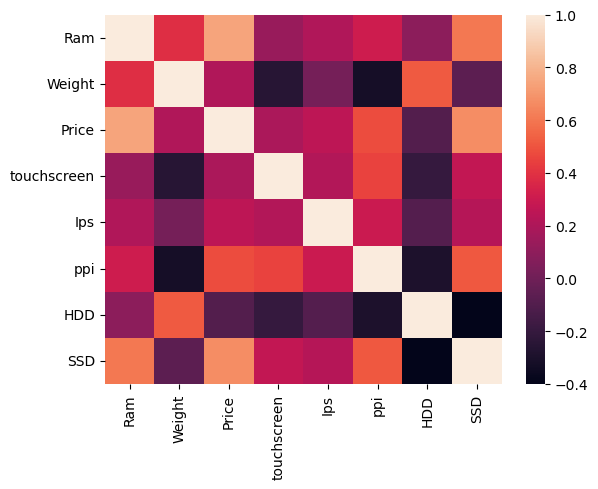

In [164]:
sns.heatmap(df.corr())

C:\Users\USER\AppData\Local\Temp\ipykernel_18464\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

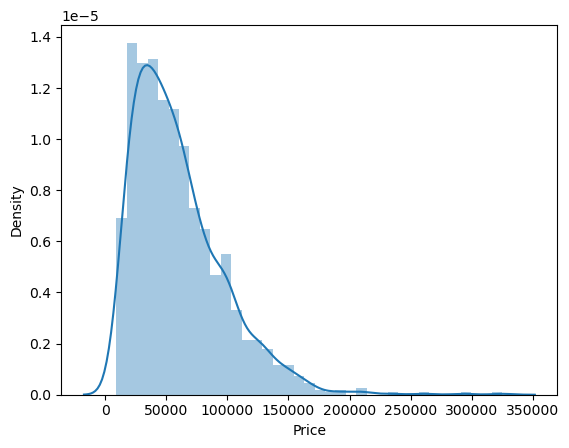

In [165]:
sns.distplot(df['Price'])

C:\Users\USER\AppData\Local\Temp\ipykernel_18464\1528561213.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

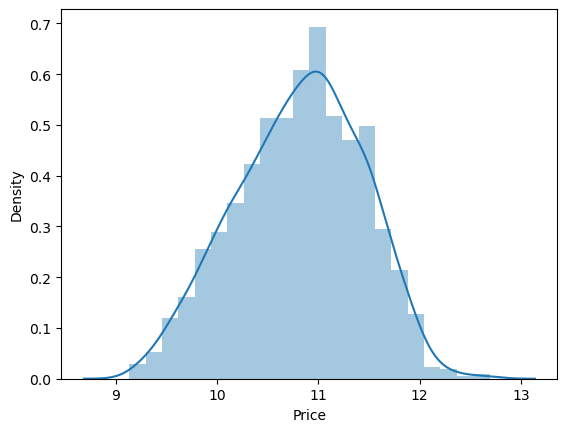

In [166]:
#applying log transformation to price(output) column.
sns.distplot(np.log(df['Price']))

In [245]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [246]:
X

,Company,TypeName,Ram,Weight,processor_name,touchscreen,Ips,ppi,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,Intel Core i5,0,1,226.983005,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,Intel Core i5,0,0,127.677940,0,0,Intel,Mac
2,HP,Notebook,8,1.86,Intel Core i5,0,0,141.211998,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,Intel Core i7,0,1,220.534624,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,Intel Core i5,0,1,226.983005,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,Intel Core i7,1,1,157.350512,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,Intel Core i7,1,1,276.053530,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,other Intel processor,0,0,111.935204,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,Intel Core i7,0,0,100.454670,1000,0,AMD,Windows


In [247]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [248]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [249]:
X_train

,Company,TypeName,Ram,Weight,processor_name,touchscreen,Ips,ppi,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,Intel Core i5,0,0,100.454670,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,Intel Core i7,0,0,141.211998,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,other Intel processor,0,0,135.094211,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,Intel Core i3,1,1,141.211998,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,Intel Core i5,0,0,141.211998,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,Intel Core i3,0,0,100.454670,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,Intel Core i7,0,0,141.211998,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,AMD Processor,0,0,100.454670,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,Intel Core i3,0,0,100.454670,2000,0,Nvidia,Others/No OS/Linux


In [250]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [251]:
#pip install xgboost

In [252]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [253]:
X_train.head()

,Company,TypeName,Ram,Weight,processor_name,touchscreen,Ips,ppi,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,Intel Core i5,0,0,100.454670,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,Intel Core i7,0,0,141.211998,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,other Intel processor,0,0,135.094211,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,Intel Core i3,1,1,141.211998,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,Intel Core i5,0,0,141.211998,1000,128,Nvidia,Windows


## Linear Regression

In [254]:
s1 = ColumnTransformer(transformers = 
                      [('col_t',OneHotEncoder(sparse = False,drop = "first",handle_unknown="ignore"),[0,1,4,10,11])],remainder = "passthrough")
s2 = LinearRegression()

pipe = Pipeline([
    ("s1",s1),
    ("s2",s2)
])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8080034629381161
MAE 0.20924313396286043


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Ridge Regression

In [255]:
s1 = ColumnTransformer(transformers = 
                      [('col_t',OneHotEncoder(sparse = False,drop = "first",handle_unknown="ignore"),[0,1,4,10,11])],remainder = "passthrough")
s2 = Ridge(alpha=10)

pipe = Pipeline([
    ("s1",s1),
    ("s2",s2)
])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8137883934163931
MAE 0.20826824869304222


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Lasso Regression

In [256]:
s1 = ColumnTransformer(transformers = 
                      [('col_t',OneHotEncoder(sparse = False,drop = "first",handle_unknown="ignore"),[0,1,4,10,11])],remainder = "passthrough")
s2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ("s1",s1),
    ("s2",s2)
])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8083211000274451
MAE 0.2096681296838742


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Decision Tree

In [257]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown="ignore"),[0,1,4,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=7)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8223174897855816
MAE 0.1957748053051072


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## KNN

In [258]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown="ignore"),[0,1,4,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8018428762962335
MAE 0.2000056468017799


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## SVM

In [259]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown="ignore"),[0,1,4,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8096558338677066
MAE 0.2014102764992504


## Random Forest

In [261]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown="ignore"),[0,1,4,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8853104434548322
MAE 0.1612368850096506


## AdaBoost

In [262]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown="ignore"),[0,1,4,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7997569804091385
MAE 0.22557716999755473


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Gradient Boost

In [263]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown="ignore"),[0,1,4,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8764761676321048
MAE 0.1629302137604404


## Xgboost

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown="ignore"),[0,1,4,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

## Voting Regresssor

In [268]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown="ignore"),[0,1,4,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,bootstrap=True,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
#xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,bootstrap=True,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('et',et)],weights=[5,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8872654592679639
MAE 0.16111493965338608


## Stacking

In [269]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown="ignore"),[0,1,4,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5))
    #('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8756020938570757
MAE 0.16999120642190121


In [270]:
import pickle

pickle.dump(df,open("df.pkl","wb"))
pickle.dump(pipe,open("pipe.pkl","wb"))


In [267]:
df.iloc[:,2:3].value_counts()

Ram
8      619
4      374
16     200
6       41
12      25
2       22
32      17
24       3
64       1
dtype: int64

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         1302 non-null   object 
 1   TypeName        1302 non-null   object 
 2   Ram             1302 non-null   int32  
 3   Weight          1302 non-null   float64
 4   Price           1302 non-null   float64
 5   processor_name  1302 non-null   object 
 6   touchscreen     1302 non-null   int64  
 7   Ips             1302 non-null   int64  
 8   ppi             1302 non-null   float64
 9   HDD             1302 non-null   int64  
 10  SSD             1302 non-null   int64  
 11  Gpu brand       1302 non-null   object 
 12  os              1302 non-null   object 
dtypes: float64(3), int32(1), int64(4), object(5)
memory usage: 137.3+ KB


In [240]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1106 entries, 183 to 1193
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         1106 non-null   object 
 1   TypeName        1106 non-null   object 
 2   Ram             1106 non-null   int32  
 3   Weight          1106 non-null   float64
 4   processor_name  1106 non-null   object 
 5   touchscreen     1106 non-null   int64  
 6   Ips             1106 non-null   int64  
 7   ppi             1106 non-null   float64
 8   HDD             1106 non-null   int64  
 9   SSD             1106 non-null   int64  
 10  Gpu brand       1106 non-null   object 
 11  os              1106 non-null   object 
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 108.0+ KB


In [241]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 248 to 470
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         196 non-null    object 
 1   TypeName        196 non-null    object 
 2   Ram             196 non-null    int32  
 3   Weight          196 non-null    float64
 4   processor_name  196 non-null    object 
 5   touchscreen     196 non-null    int64  
 6   Ips             196 non-null    int64  
 7   ppi             196 non-null    float64
 8   HDD             196 non-null    int64  
 9   SSD             196 non-null    int64  
 10  Gpu brand       196 non-null    object 
 11  os              196 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 19.1+ KB


In [242]:
X_train["Ram"].value_counts()

8     532
4     310
16    171
6      35
12     21
2      17
32     16
24      3
64      1
Name: Ram, dtype: int64

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         1302 non-null   object 
 1   TypeName        1302 non-null   object 
 2   Ram             1302 non-null   int32  
 3   Weight          1302 non-null   float64
 4   Price           1302 non-null   float64
 5   processor_name  1302 non-null   object 
 6   touchscreen     1302 non-null   int64  
 7   Ips             1302 non-null   int64  
 8   ppi             1302 non-null   float64
 9   HDD             1302 non-null   int64  
 10  SSD             1302 non-null   int64  
 11  Gpu brand       1302 non-null   object 
 12  os              1302 non-null   object 
dtypes: float64(3), int32(1), int64(4), object(5)
memory usage: 137.3+ KB
